In [1]:
#importing the dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_val_score
import warnings
warnings.filterwarnings(action='ignore')
sns.set_style('whitegrid')

In [2]:
titanic=pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# let's drop the passengerId
titanic.drop('PassengerId',axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

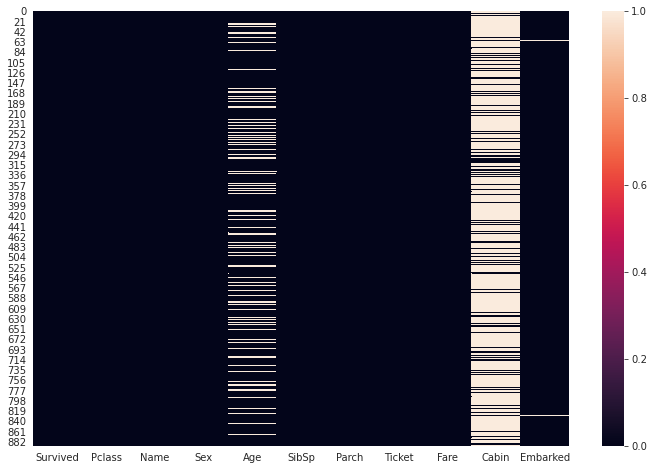

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(titanic.isnull())

In [7]:
# since the cabin has almost all the values of it as null we can drop the feature
titanic.drop('Cabin',axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### EDA for the data

<AxesSubplot:xlabel='Sex', ylabel='count'>

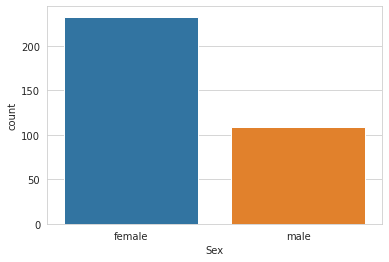

In [8]:
# analyzing how many people survied based on their gender
df_survived=titanic.groupby('Survived')
count=df_survived.get_group(1)['Sex']
sns.countplot(count)

<AxesSubplot:ylabel='Survived'>

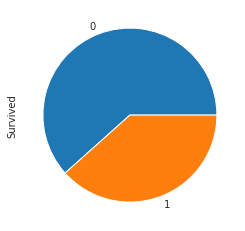

In [9]:
#let's see the target feature i.e. survived and see if the data is balanced or not
titanic.Survived.value_counts().plot(kind='pie')

It looks balanced so we don't need to balance it out.

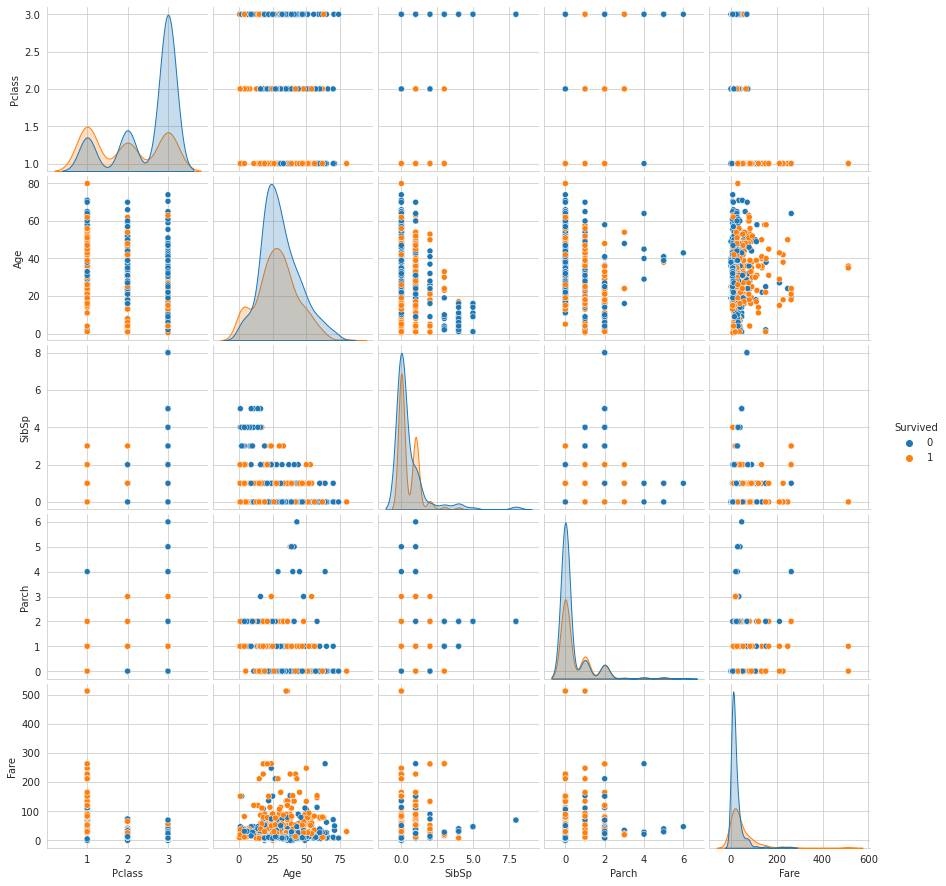

In [10]:
# let's see how the data is clustered
sns.pairplot(data=titanic,hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

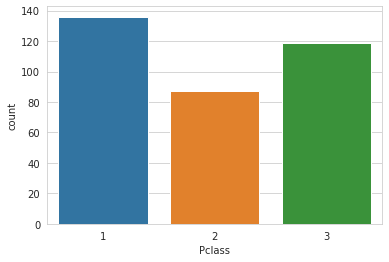

In [11]:
# let's see the relationship between the pclass and the survived
df_survived.get_group(1)['Pclass'].value_counts()
sns.countplot(df_survived.get_group(1)['Pclass'])

## Feature engineering

In [12]:
#since the gender represents the name we don't need the name feature
titanic.drop('Name',axis=1,inplace=True)

In [13]:
# let's impute the null values
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [14]:
age_mean=titanic['Age'].mean()

In [15]:
titanic['Age'].fillna(age_mean,inplace=True)
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [16]:
titanic.dropna(inplace=True)
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [17]:
titanic.drop('Ticket',axis=1,inplace=True)

In [18]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
# let's encode the categorical features
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
category=[feature for feature in titanic.columns if titanic[feature].dtypes=='O']
for feature in category:
    titanic[feature]=encode.fit_transform(titanic[feature])

In [20]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [21]:
x=titanic.drop('Survived',axis=1)
y=titanic.Survived

In [22]:
from xgboost import XGBClassifier
models=[SVC(),RandomForestClassifier(),AdaBoostClassifier(),LogisticRegression(),XGBClassifier()]
for model in models:
    print(f"{model}'s score is:{cross_val_score(estimator=model,X=x,y=y,cv=5).mean()}")

SVC()'s score is:0.6738081635244081
RandomForestClassifier()'s score is:0.8144289976512409
AdaBoostClassifier()'s score is:0.7998032120865867
LogisticRegression()'s score is:0.786313718021964
[16:15:45] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:45] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:45] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed

In [23]:
XGBClassifier()
estimator=np.arange(100,500,20)
lr=np.linspace(0,1,15)
maxdep=np.arange(100,1000,30)
gam=np.linspace(0,5,15)
print(estimator)

[100 120 140 160 180 200 220 240 260 280 300 320 340 360 380 400 420 440
 460 480]


In [24]:
# let's do the hyperparameter tuning on the data
params={
    'n_estimators':estimator,
    'max_depth':maxdep,
    'learning_rate':lr,
    'gamma':gam
}
rdz=RandomizedSearchCV(estimator=XGBClassifier(),param_distributions=params,cv=5)

In [25]:
rdz.fit(x,y)

[16:15:45] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:46] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:46] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:47] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

[16:15:55] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:56] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:56] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:56] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                        'learning_rate': array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.

In [26]:
df_results=pd.DataFrame(rdz.cv_results_)
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.397136,0.026295,0.001885,0.000118,400,190,0.928571,4.28571,"{'n_estimators': 400, 'max_depth': 190, 'learn...",0.780899,0.803371,0.859551,0.803371,0.841808,0.817800,0.028627,9
1,0.378878,0.032321,0.001812,0.000056,380,760,0.642857,4.64286,"{'n_estimators': 380, 'max_depth': 760, 'learn...",0.803371,0.820225,0.853933,0.808989,0.836158,0.824535,0.018480,4
2,0.509488,0.014584,0.002453,0.000845,460,610,0.714286,3.92857,"{'n_estimators': 460, 'max_depth': 610, 'learn...",0.775281,0.825843,0.848315,0.814607,0.853107,0.823430,0.027936,5
3,0.129755,0.009804,0.002264,0.000493,120,580,0.571429,2.5,"{'n_estimators': 120, 'max_depth': 580, 'learn...",0.803371,0.825843,0.870787,0.814607,0.858757,0.834673,0.025864,1
4,0.392140,0.038487,0.002591,0.001337,320,610,0.214286,3.57143,"{'n_estimators': 320, 'max_depth': 610, 'learn...",0.803371,0.814607,0.848315,0.797753,0.853107,0.823430,0.022976,5
5,0.279962,0.021573,0.002310,0.000078,320,340,0,2.5,"{'n_estimators': 320, 'max_depth': 340, 'learn...",0.617978,0.617978,0.617978,0.617978,0.615819,0.617546,0.000863,10
6,0.210948,0.024877,0.004043,0.003262,180,220,0.857143,3.57143,"{'n_estimators': 180, 'max_depth': 220, 'learn...",0.797753,0.820225,0.870787,0.825843,0.841808,0.831283,0.024279,2
7,0.458310,0.038422,0.001967,0.000120,400,190,0.857143,3.92857,"{'n_estimators': 400, 'max_depth': 190, 'learn...",0.786517,0.820225,0.876404,0.825843,0.836158,0.829029,0.028949,3
8,0.265997,0.013593,0.002754,0.000888,240,490,0.642857,1.07143,"{'n_estimators': 240, 'max_depth': 490, 'learn...",0.780899,0.814607,0.848315,0.814607,0.836158,0.818917,0.022996,8
9,0.145211,0.009480,0.002085,0.000089,120,550,0.857143,1.07143,"{'n_estimators': 120, 'max_depth': 550, 'learn...",0.792135,0.820225,0.842697,0.814607,0.847458,0.823424,0.020080,7


In [27]:
df_results[['params','mean_test_score','rank_test_score']].sort_values('rank_test_score')


,params,mean_test_score,rank_test_score
3,"{'n_estimators': 120, 'max_depth': 580, 'learn...",0.834673,1
6,"{'n_estimators': 180, 'max_depth': 220, 'learn...",0.831283,2
7,"{'n_estimators': 400, 'max_depth': 190, 'learn...",0.829029,3
1,"{'n_estimators': 380, 'max_depth': 760, 'learn...",0.824535,4
2,"{'n_estimators': 460, 'max_depth': 610, 'learn...",0.823430,5
4,"{'n_estimators': 320, 'max_depth': 610, 'learn...",0.823430,5
9,"{'n_estimators': 120, 'max_depth': 550, 'learn...",0.823424,7
8,"{'n_estimators': 240, 'max_depth': 490, 'learn...",0.818917,8
0,"{'n_estimators': 400, 'max_depth': 190, 'learn...",0.817800,9
5,"{'n_estimators': 320, 'max_depth': 340, 'learn...",0.617546,10


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
model=XGBClassifier(n_estimators=260,max_depth=850,learning_rate=0.0714286,gamma=1.07143)
model.fit(x_train,y_train)
y_pre=model.predict(x_test)
model.score(x_test,y_test)

[16:16:02] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8146067415730337